In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2021-10-27 11:39:00.471377


<h2>Econdb - The Database of Economic Indicators</h2>

Econdb https://www.econdb.com/ sisältää paljon talouteen liittyviä aikasarjoja. Sieltä voi hakea aikasarjan tickerin perusteella tai käyttämällä valmista Econdb:n antamaa Python komentoa.

Seuraavassa tarvitaan pandas-datareader -kirjastoa, joka ei kuulu Anacondan vakioasennukseen. Voit asentaa sen esimerkiksi seuraavasti:
<ul>
    <li>Käynnistä Anaconda Navigator ja valitse <b>Environments</b></li>
    <li>Jos <b>pandas-datareader</b> ei ole <b>Installed</b>-listassa, niin siirry <b>Not installed</b> -listaan</li>
    <li>Jos <b>pandas-datareader</b> ei löydy tästäkään listasta, niin päivitä lista (<b>Update index</b>)</li>
    <li>Valitse <b>pandas-datareader</b> ja napsauta alareunasta <b>Apply</b> ja seuraa asennuksen vaiheita.</li>
</ul>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
%matplotlib inline

<h3>Haku tickerin perusteella</h3>

In [3]:
# Suomen bruttokansantuotteen reaaliarvot
df1 = web.DataReader('ticker=RGDPFI', 'econdb')

# Ruotsin bruttokansantuotteen reaaliarvot
df2 = web.DataReader('ticker=RGDPSE', 'econdb')

# Yhdistetään datat ja muutetaan arvot muutosprosenteiksi
df3 = pd.concat([df1.pct_change(), df2.pct_change()], axis = 1)
df3.columns = ['Finland', 'Sweden']
df3

,Finland,Sweden
TIME_PERIOD,,
2017-01-01,NaN,NaN
2017-04-01,0.009887,0.012138
2017-07-01,0.003948,0.011095
2017-10-01,0.008524,0.001485
2018-01-01,0.000688,0.002666
2018-04-01,-0.000247,0.008790
2018-07-01,-0.000776,-0.003977
2018-10-01,0.001871,0.013490
2019-01-01,0.007294,0.005094


Text(0.5, 1.0, 'BKT:n muutokset')

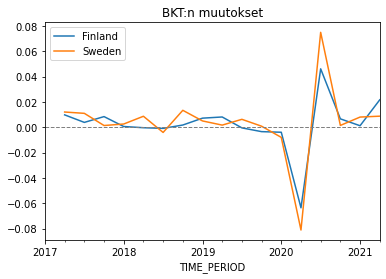

In [4]:
df3.plot()
plt.axhline(y=0, color = 'gray', linewidth = 1, linestyle = '--')
plt.title('BKT:n muutokset')

In [5]:
df3.corr()

,Finland,Sweden
Finland,1.000000,0.951033
Sweden,0.951033,1.000000


<h3>Haku Econdb:stä kopioidulla komennolla</h3>

In [6]:
# Seuraava koodi kopioitu Econdb:stä
df = web.DataReader('dataset=NAMQ_10_GDP&v=Geopolitical entity (reporting)&h=TIME&from=2017-08-01&GEO=\
    [AL,AT,BE,BA,BG,HR,CY,CZ,DK,EE,EA19,FI,FR,DE,EL,HU,IS,IE,IT,XK,LV,LT,LU,MT,ME,NL,MK,NO,PL,PT,RO,RS,SK,SI,ES,SE,CH,TR,UK]\
    &NA_ITEM=[B1GQ]&S_ADJ=[SCA]&UNIT=[CLV10_MNAC]', 'econdb')
df

Frequency                                                                                 Quarterly  \
Unit of measure                     Chain linked volumes (2010), million units of national currency   
Seasonal adjustment                                           Seasonally and calendar adjusted data   
National accounts indicator (ESA10)                         Gross domestic product at market prices   
Geopolitical entity (reporting)                                                             Austria   
TIME_PERIOD                                                                                           
2017-10-01                                                                       82235                
2018-01-01                                                                       82951                
2018-04-01                                                                       83223                
2018-07-01                                                                       83402                
2018-10-01                                                                       84241                
2019-01-01                                                                       84959                
2019-04-01                                                                       84466                
2019-07-01                                                                       84783                
2019-10-01                                                                       84510                
2020-01-01                                                                       82408                
2020-04-01                                                                       72911                
2020-07-01                                                                       80937                
2020-10-01                                                                       79337                
2021-01-01                                                                       78976                
2021-04-01                                                                       82120                

Frequency                                                                     \
Unit of measure                                                                
Seasonal adjustment                                                            
National accounts indicator (ESA10)                                            
Geopolitical entity (reporting)     Belgium Bulgaria Croatia Cyprus  Czechia   
TIME_PERIOD                                                                    
2017-10-01                           100287    21333   89254   5127  1191472   
2018-01-01                           100686    21425   89222   5248  1197312   
2018-04-01                           101147    21614   90872   5257  1206109   
2018-07-01                           101537    21838   91568   5312  1213483   
2018-10-01                           102522    22025   92082   5437  1221954   
2019-01-01                           102787    22298   93246   5550  1232838   
2019-04-01                           103246    22546   93716   5580  1242528   
2019-07-01                           103953    22690   94444   5611  1249343   
2019-10-01                           104633    22862   95203   5636  1257203   
2020-01-01                           101349    22025   93813   5593  1214806   
2020-04-01                            89553    20473   80047   4913  1106569   
2020-07-01                           100195    22017   84901   5314  1181291   
2020-10-01                           100056    21972   88499   5387  1189999   
2021-01-01                           101301    21960   92948   5474  1184969   
2021-04-01                           103051    21904   93284   5567  1196278   

Frequency                                                            ...  \
Unit of measure                                                      ...   
Sea

In [7]:
# Näytetään kaikki sarakkeet
pd.set_option('max_columns', None)
# Sarakkeiden monitasoisen hierarkisen indeksin voi poistaa:
df.columns = df.columns.droplevel([0, 1, 2, 3])
df

Geopolitical entity (reporting),Austria,Belgium,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,Finland,France,Germany,Hungary,Ireland,Italy,Latvia,Lithuania,Luxembourg,North Macedonia,Malta,Netherlands,Norway,Euro area (19 countries),Poland,Greece,Portugal,Romania,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Turkey
TIME_PERIOD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-10-01,82235,100287,21333,89254,5127,1191472,515784,4803,50635,549646,741570,8264146,69466,404195,5700,9156,12699,128085,2602,176538,732586,2625337,461609,46241,45955,173370,905925,20646,10295,287064,1051858,180604,467628
2018-01-01,82951,100686,21425,89222,5248,1197312,518425,4854,50670,549756,738363,8416491,69351,404102,5786,9232,12727,130377,2604,177243,735950,2626091,467370,46593,46290,174232,925536,20805,10316,288149,1054662,182547,474496
2018-04-01,83223,101147,21614,90872,5257,1206109,521031,4891,50657,551744,742476,8507260,71799,404059,5863,9344,12687,130804,2694,178352,737151,2639414,473334,46690,46650,177156,935523,21042,10443,289838,1063932,184228,477616
2018-07-01,83402,101537,21838,91568,5312,1213483,524168,4926,50618,554144,739339,8603597,70690,404499,5925,9424,12841,131863,2768,178864,742203,2641420,480277,46733,46896,179245,938123,21248,10567,291338,1059701,183867,469841
2018-10-01,84241,102522,22025,92082,5437,1221954,526786,4991,50712,557810,742197,8700221,72201,405755,5981,9548,12904,133521,2775,179729,743308,2656809,484432,46995,47181,180224,940879,21360,10710,293305,1073997,184214,454881
2019-01-01,84959,102787,22298,93246,5550,1232838,530454,5072,51082,561429,750021,8856177,72946,405850,6046,9685,13078,133720,2774,180827,742214,2675237,493235,47448,47597,183244,948765,21552,10764,295069,1079468,184704,463528
2019-04-01,84466,103246,22546,93716,5580,1242528,532852,5102,51502,564344,746327,8912801,74990,406426,6042,9806,13295,136462,2855,181581,743059,2680206,496369,47744,47866,184902,962946,21630,10731,296147,1081417,185437,474560
2019-07-01,84783,103953,22690,94444,5611,1249343,535431,5133,51483,565258,749394,8974676,74680,407285,6007,9825,13245,136840,2896,182243,742756,2687729,502444,47465,48087,185396,984013,21680,10877,297270,1088306,186501,474800
2019-10-01,84510,104633,22862,95203,5636,1257203,535878,5141,51310,563100,748836,9041986,75924,405452,6031,9954,13224,136186,2943,183162,756073,2687463,504051,47445,48484,186903,1003168,21794,11028,298389,1089330,187363,481280


Text(0.5, 1.0, 'BKT:n muutokset')

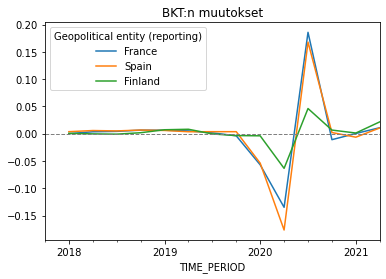

In [8]:
df[['France', 'Spain', 'Finland']].pct_change().plot()
plt.axhline(y=0, color = 'gray', linewidth = 1, linestyle = '--')
plt.title('BKT:n muutokset')